In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns


# target = 'DDefaut_NDB'
# features = [dis""]

# # Normalisation si nécessaire (surtout pour les variables continues)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Étape 2 : Construire et entraîner le modèle
# model = LogisticRegression(random_state=42)
# model.fit(X_train, y_train)

# # Étape 3 : Évaluer le modèle
# # Prédire les probabilités
# y_pred_prob = model.predict_proba(X_test)[:, 1]
# y_pred_class = model.predict(X_test)

# # Métriques
# print("Classification Report:\n", classification_report(y_test, y_pred_class))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

# # AUC-ROC
# auc = roc_auc_score(y_test, y_pred_prob)
# print(f"AUC-ROC: {auc:.2f}")

# # Tracer la courbe ROC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.title("ROC Curve")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend()
# plt.grid()
# plt.show()

# # Importances des coefficients
# coefficients = pd.DataFrame({
#     'Feature': features,
#     'Coefficient': model.coef_[0]
# }).sort_values(by='Coefficient', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="viridis")
# plt.title("Feature Importances in Logistic Regression")
# plt.tight_layout()
# plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

final_train = pd.read_excel('../data/final_train.xlsx')
final_test = pd.read_excel('../data/final_test.xlsx')
final_oot = pd.read_excel('../data/final_oot.xlsx')


=== Évaluation sur final_test ===
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      4615
           1       0.31      0.65      0.42       291

    accuracy                           0.89      4906
   macro avg       0.64      0.78      0.68      4906
weighted avg       0.94      0.89      0.91      4906

Confusion Matrix:
 [[4196  419]
 [ 101  190]]
AUC-ROC (final_test): 0.88

=== Évaluation sur final_oot ===
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      6203
           1       0.31      0.63      0.42       406

    accuracy                           0.89      6609
   macro avg       0.64      0.77      0.68      6609
weighted avg       0.93      0.89      0.91      6609

Confusion Matrix:
 [[5642  561]
 [ 150  256]]
AUC-ROC (final_oot): 0.86


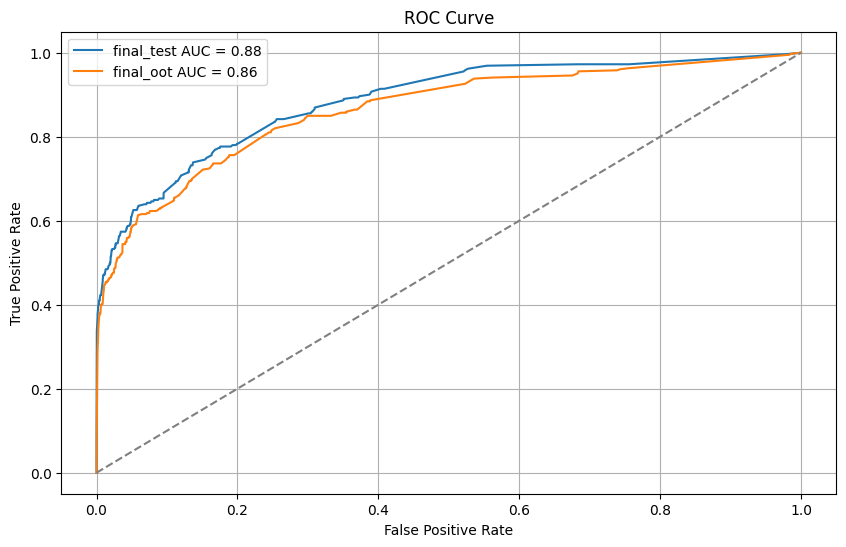

C:\Users\mariu\AppData\Local\Temp\ipykernel_11144\3420625941.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="viridis")


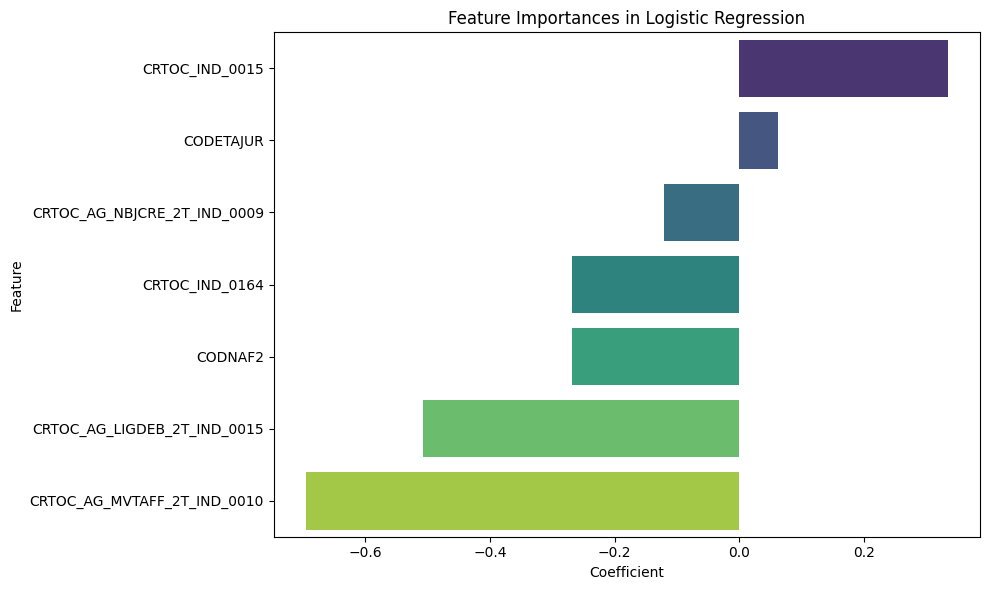

In [3]:

target = 'DDefaut_NDB'
features = [
    'CODNAF2', 'CODETAJUR', 'CRTOC_AG_MVTAFF_2T_IND_0010', 
    'CRTOC_AG_NBJCRE_2T_IND_0009', 'CRTOC_IND_0164', 
    'CRTOC_AG_LIGDEB_2T_IND_0015', 'CRTOC_IND_0015'
]

# Normalisation des caractéristiques continues (si applicable)
scaler = StandardScaler()
final_train[features] = scaler.fit_transform(final_train[features])
final_test[features] = scaler.transform(final_test[features])
final_oot[features] = scaler.transform(final_oot[features])

# Modèle de régression logistique
model = LogisticRegression(random_state=42, class_weight='balanced')  # Gestion des classes déséquilibrées

# Entraîner sur final_train
X_train = final_train[features]
y_train = final_train[target]
model.fit(X_train, y_train)

# Évaluation sur final_test
X_test = final_test[features]
y_test = final_test[target]

y_pred_prob_test = model.predict_proba(X_test)[:, 1]
y_pred_class_test = model.predict(X_test)

# Métriques pour final_test
print("=== Évaluation sur final_test ===")
print("Classification Report:\n", classification_report(y_test, y_pred_class_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class_test))
auc_test = roc_auc_score(y_test, y_pred_prob_test)
print(f"AUC-ROC (final_test): {auc_test:.2f}")

# Évaluation sur final_oot
X_oot = final_oot[features]
y_oot = final_oot[target]

y_pred_prob_oot = model.predict_proba(X_oot)[:, 1]
y_pred_class_oot = model.predict(X_oot)

# Métriques pour final_oot
print("\n=== Évaluation sur final_oot ===")
print("Classification Report:\n", classification_report(y_oot, y_pred_class_oot))
print("Confusion Matrix:\n", confusion_matrix(y_oot, y_pred_class_oot))
auc_oot = roc_auc_score(y_oot, y_pred_prob_oot)
print(f"AUC-ROC (final_oot): {auc_oot:.2f}")

# Courbes ROC
plt.figure(figsize=(10, 6))
# ROC pour final_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
plt.plot(fpr_test, tpr_test, label=f"final_test AUC = {auc_test:.2f}")
# ROC pour final_oot
fpr_oot, tpr_oot, _ = roc_curve(y_oot, y_pred_prob_oot)
plt.plot(fpr_oot, tpr_oot, label=f"final_oot AUC = {auc_oot:.2f}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Importances des coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="viridis")
plt.title("Feature Importances in Logistic Regression")
plt.tight_layout()
plt.show()
